# Task 2 - Dimensionality Reduction (27 points)

**Task Description:** Principal Component Analysis (PCA) is a dimensionality reduction method that is often used to reduce the dimensionality of datasets, by transforming a large set of variables into a smaller one, while preserving as much  variance  as  possible.  There  are  two  methods  for  performing  a  Principal  Component  Analysis:  using Eigenvector  Decomposition  (EIG)  and  the  more  generalized  Singular  Value  Decomposition  (SVD). 

**Input:** In this exercise, you will use the Wheat Seeds[1] dataset, which involves the prediction of species given measurements of seeds from different types of wheat. The dataset can be found as `seeds.csv` in the data folder. Do not forget to exclude the data that should not be considered for dimensionality reduction when you apply the algorithms on the dataset.

[1] https://archive.ics.uci.edu/ml/datasets/seeds

In [1]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# You may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 2.1 PCA Implementation (16 points)
### 2.1.1 Implement PCA from scratch* via SVD based on the lecture slides. Project the provided dataset onto the first two principal components. (10 points).
\* You may use any native Python package, numpy, and scalers from sklearn.

In [2]:
def pca_via_svd(X, n_components =2):
    X_centered = X - np.mean(X, axis =0)
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    n = X.shape[0]
    explained_variance = (S**2) /(n - 1)
    total_var = explained_variance.sum()
    explained_variance_ratio = explained_variance / total_var
    components = Vt.T
    X_transformed = U * S
    
    return X_transformed, components, explained_variance_ratio

data = np.genfromtxt('data/seeds.csv', delimiter=',', skip_header=1)
X = data[:, :-1]
y = data[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_transformed, components, explained_variance_ratio = pca_via_svd(X_scaled, n_components=2)

pc1 = X_transformed[:, 0]
pc2 = X_transformed[:, 1]
print("explained variance ratio:", explained_variance_ratio[:2])

explained variance ratio: [0.71878659 0.17130487]


### 2.1.2 Compare your results with the PCA algorithm of sklearn. (6 points)
- Run sklearn's PCA on the provided dataset. Project the data onto the first two principal components. (3 points)
- Create scatter plots for the results (your implementation and sklearn's). Colour the points by their corresponding Type label. (3 points)

In [3]:
sklearn_pca = PCA(n_components=2)
sklearn_transformed = sklearn_pca.fit_transform(X_scaled)

print("sklearn pca explained variance ratio:", sklearn_pca.explained_variance_ratio_)

sklearn pca explained variance ratio: [0.71878659 0.17130487]


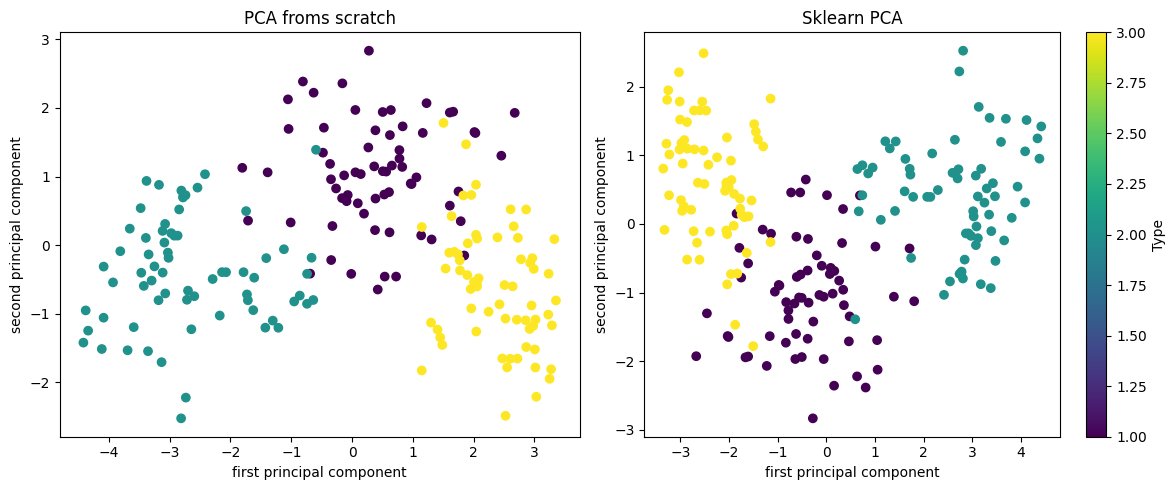

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(pc1, pc2, c=y, cmap='viridis')
ax1.set_title('PCA froms scratch')
ax1.set_xlabel('first principal component')
ax1.set_ylabel('second principal component')

ax2.scatter(sklearn_transformed[:, 0], sklearn_transformed[:, 1], c=y, cmap='viridis')
ax2.set_title('Sklearn PCA')
ax2.set_xlabel('first principal component')
ax2.set_ylabel('second principal component')

plt.colorbar(ax2.collections[0], label='Type')
plt.tight_layout()
plt.show()

## 2.2 Briefly explain the “curse of dimensionality” problem and the importance of PCA in it. (5 points)
Write the answer in your words but support it by citing at least 1 reference. (Do not use AI tools.)

## *not done*

## 2.3 Non-Negative Matrix Factorization (6 points)

Apply NMF on the dataset. Create a scatter plot of the solutions. You can use the NMF implementation from sklearn.decomposition. Before using NMF on the dataset, scale it with an appropriate scaler from sklearn.preprocessing.

## *not done*